<a href="https://colab.research.google.com/github/Swetha-Anaparthi/adaptive_user_prediction/blob/main/adaptive_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file1=pd.read_csv(r"/content/takehome_user_engagement.csv",index_col='time_stamp', parse_dates=True)
file1

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [3]:
#Counting number of times a particular user has visited 
visits=file1.groupby(file1["user_id"])["visited"].sum()
visits.to_csv("visit.csv")

In [4]:
visit=pd.read_csv(r"/content/visit.csv")
visit

,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1
...,...,...
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1


In [5]:
active_user,col=visit.shape
active_user

8823

In [6]:
#Identifying the users who have visite more than 3 times
visit3=visit.loc[visit["visited"]>2]
visit3

,user_id,visited
1,2,14
7,10,284
13,20,7
24,33,18
28,42,342
...,...,...
8802,11975,216
8805,11980,8
8806,11981,4
8812,11988,30


In [7]:
output=pd.merge(visit3,file1,how="inner",left_on="user_id",right_on="user_id")
output

,user_id,visited_x,visited_y
0,2,14,1
1,2,14,1
2,2,14,1
3,2,14,1
4,2,14,1
...,...,...,...
200997,11991,5,1
200998,11991,5,1
200999,11991,5,1
201000,11991,5,1


In [8]:
#Calculating number of times a user has visites the product in a week
output_agg=file1.groupby('user_id').resample('1W').sum()
output_agg.to_csv("agg1.csv")

In [9]:
user3=pd.read_csv(r"/content/agg1.csv")
user3

,user_id,time_stamp,user_id.1,visited
0,1,2014-04-27,1,1
1,2,2013-11-17,2,1
2,2,2013-11-24,0,0
3,2,2013-12-01,2,1
4,2,2013-12-08,0,0
...,...,...,...,...
82277,11996,2013-09-08,11996,1
82278,11997,2013-01-20,11997,1
82279,11998,2014-04-27,11998,1
82280,11999,2012-06-03,11999,1


In [10]:
user3.drop("user_id.1",axis=1,inplace=True)


In [11]:
user3

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-11-24,0
3,2,2013-12-01,1
4,2,2013-12-08,0
...,...,...,...
82277,11996,2013-09-08,1
82278,11997,2013-01-20,1
82279,11998,2014-04-27,1
82280,11999,2012-06-03,1


In [12]:
user_3=user3.loc[user3["visited"]>=3]
user_3

,user_id,time_stamp,visited
13,2,2014-02-09,3
33,10,2013-03-03,3
39,10,2013-04-14,3
41,10,2013-04-28,3
42,10,2013-05-05,4
...,...,...,...
82257,11988,2014-04-06,3
82261,11988,2014-05-04,4
82263,11988,2014-05-18,3
82264,11988,2014-05-25,5


In [13]:
#Identifying the users who have visited more than 2 times in a week
user_3_uni=user_3.groupby(user_3["user_id"])["visited"].sum()
user_3_uni

user_id
2          3
10       249
20         3
33         3
42       331
        ... 
11965      3
11967     32
11969     98
11975    193
11988     22
Name: visited, Length: 1445, dtype: int64

In [14]:
data=np.ones(1445).reshape(-1,1)
data

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [15]:
user_3_uni.to_csv("user_3_uni.csv")

In [16]:
#Data of users who have more than 3 times a week ie, list of adaptive users
user_3_unidata=pd.read_csv(r"/content/user_3_uni.csv")
user_3_unidata=user_3_unidata.assign(active=data)
user_3_unidata

,user_id,visited,active
0,2,3,1.0
1,10,249,1.0
2,20,3,1.0
3,33,3,1.0
4,42,331,1.0
...,...,...,...
1440,11965,3,1.0
1441,11967,32,1.0
1442,11969,98,1.0
1443,11975,193,1.0


In [17]:
adaptive_user,b=user_3_unidata.shape
adaptive_user

1445

In [18]:
(adaptive_user/active_user)*100

16.377649325626205

16.377%  of active users are adaptive 

In [19]:
#output_agg1=file1.groupby('user_id').resample('10D').sum()
#output_agg1.to_csv("agg2.csv")

In [20]:
#Details of all the users
file2=pd.read_csv(r"/content/data.csv")
file2.head(10)

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,17-12-2013 03:37,Cunha Eduardo,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,16-12-2012 13:24,Sewell Tyler,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,31-07-2013 05:34,Hamilton Danielle,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,05-11-2013 04:04,Amsel Paul,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,16-01-2013 22:08,Santos Carla,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [21]:
total_users,y=file2.shape
total_users

12000

In [22]:
output=pd.merge(user_3_unidata,file2,how="inner",left_on="user_id",right_on="object_id")
output
#data related to adaptive users

,user_id,visited,active,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2,3,1.0,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10,249,1.0,10,16-01-2013 22:08,Santos Carla,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,20,3,1.0,20,06-03-2014 11:46,Helms Mikayla,SIGNUP,1.401364e+09,0,0,58,NaN
3,33,3,1.0,33,11-03-2014 06:29,Araujo José,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,42,331,1.0,42,11-11-2012 19:05,Pinto Giovanna,SIGNUP,1.401045e+09,1,0,235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,11965,3,1.0,11965,25-04-2014 07:17,Storey Lewis,GUEST_INVITE,1.400657e+09,0,0,65,11251.0
1441,11967,32,1.0,11967,12-01-2014 08:12,Barbosa Pedro,GUEST_INVITE,1.401524e+09,0,0,15,5688.0
1442,11969,98,1.0,11969,01-06-2013 00:48,Dickinson Aidan,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
1443,11975,193,1.0,11975,23-03-2013 11:10,Daecher Jürgen,GUEST_INVITE,1.400757e+09,1,0,31,6410.0


In [23]:
output.drop("object_id",axis=1,inplace=True)
#Dropping unwanted columns

In [24]:
output

,user_id,visited,active,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2,3,1.0,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10,249,1.0,16-01-2013 22:08,Santos Carla,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,20,3,1.0,06-03-2014 11:46,Helms Mikayla,SIGNUP,1.401364e+09,0,0,58,NaN
3,33,3,1.0,11-03-2014 06:29,Araujo José,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,42,331,1.0,11-11-2012 19:05,Pinto Giovanna,SIGNUP,1.401045e+09,1,0,235,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1440,11965,3,1.0,25-04-2014 07:17,Storey Lewis,GUEST_INVITE,1.400657e+09,0,0,65,11251.0
1441,11967,32,1.0,12-01-2014 08:12,Barbosa Pedro,GUEST_INVITE,1.401524e+09,0,0,15,5688.0
1442,11969,98,1.0,01-06-2013 00:48,Dickinson Aidan,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
1443,11975,193,1.0,23-03-2013 11:10,Daecher Jürgen,GUEST_INVITE,1.400757e+09,1,0,31,6410.0


In [25]:
output.to_csv(r"adaptive_user_data.csv")

**Adaptive users**

In [26]:
ada_user_data=pd.read_csv(r"/content/adaptive_user_data.csv")
ada_user_data["invited_by_user_id"]=ada_user_data["invited_by_user_id"].fillna(0)
ada_user_data

,Unnamed: 0,user_id,visited,active,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,0,2,3,1.0,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,1,10,249,1.0,16-01-2013 22:08,Santos Carla,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,2,20,3,1.0,06-03-2014 11:46,Helms Mikayla,SIGNUP,1.401364e+09,0,0,58,0.0
3,3,33,3,1.0,11-03-2014 06:29,Araujo José,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,4,42,331,1.0,11-11-2012 19:05,Pinto Giovanna,SIGNUP,1.401045e+09,1,0,235,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,11965,3,1.0,25-04-2014 07:17,Storey Lewis,GUEST_INVITE,1.400657e+09,0,0,65,11251.0
1441,1441,11967,32,1.0,12-01-2014 08:12,Barbosa Pedro,GUEST_INVITE,1.401524e+09,0,0,15,5688.0
1442,1442,11969,98,1.0,01-06-2013 00:48,Dickinson Aidan,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
1443,1443,11975,193,1.0,23-03-2013 11:10,Daecher Jürgen,GUEST_INVITE,1.400757e+09,1,0,31,6410.0


In [27]:
a,b=ada_user_data.shape
a

1445

In [28]:
data=np.ones(a).reshape(-1,1)
data

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [29]:
ada_user_data2=ada_user_data.assign(ones=data)
ada_user_data2

,Unnamed: 0,user_id,visited,active,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ones
0,0,2,3,1.0,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
1,1,10,249,1.0,16-01-2013 22:08,Santos Carla,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0
2,2,20,3,1.0,06-03-2014 11:46,Helms Mikayla,SIGNUP,1.401364e+09,0,0,58,0.0,1.0
3,3,33,3,1.0,11-03-2014 06:29,Araujo José,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1.0
4,4,42,331,1.0,11-11-2012 19:05,Pinto Giovanna,SIGNUP,1.401045e+09,1,0,235,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,11965,3,1.0,25-04-2014 07:17,Storey Lewis,GUEST_INVITE,1.400657e+09,0,0,65,11251.0,1.0
1441,1441,11967,32,1.0,12-01-2014 08:12,Barbosa Pedro,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,1.0
1442,1442,11969,98,1.0,01-06-2013 00:48,Dickinson Aidan,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,1.0
1443,1443,11975,193,1.0,23-03-2013 11:10,Daecher Jürgen,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1.0


In [30]:
(adaptive_user/total_users)*100

12.041666666666668


Only 12.04 % of total users are adaptive
 
Only 16.377% of active users are adaptive

In [31]:
ada_user_s=ada_user_data2.groupby(ada_user_data2["creation_source"])["ones"].sum()
ada_user_s

creation_source
GUEST_INVITE          326.0
ORG_INVITE            491.0
PERSONAL_PROJECTS     147.0
SIGNUP                275.0
SIGNUP_GOOGLE_AUTH    206.0
Name: ones, dtype: float64

In [32]:
ada_user_s.describe

<bound method NDFrame.describe of creation_source
GUEST_INVITE          326.0
ORG_INVITE            491.0
PERSONAL_PROJECTS     147.0
SIGNUP                275.0
SIGNUP_GOOGLE_AUTH    206.0
Name: ones, dtype: float64>

Text(0.5, 1.0, 'Source')

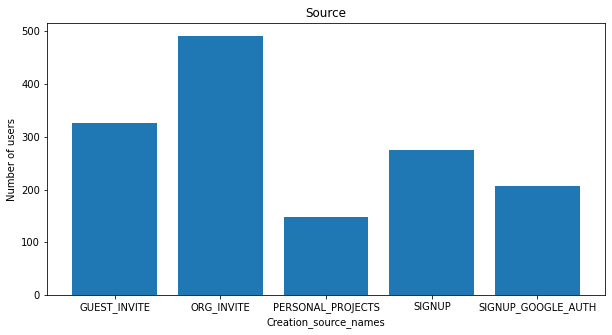

In [56]:
plt.figure(figsize=(10,5))
plt.bar(x=ada_user_s.index,height=ada_user_s.values)
plt.xlabel("Creation_source_names")
plt.ylabel("Number of users")
plt.title("Source")

Maximum number of adatpive users have creared the account using "ORG INVITE" 

Least number of adaptive users have created the account using "PERSONAL PROJECTS"

In [34]:
ada_user_data2["visited"].corr(ada_user_data2["opted_in_to_mailing_list"])

-0.009628640959967055

In [35]:
ada_user_org_id=ada_user_data2.groupby(ada_user_data2["org_id"])["ones"].sum()
ada_user_org_id

org_id
0      11.0
1      14.0
2      13.0
3      13.0
4      11.0
       ... 
410     1.0
411     3.0
413     2.0
414     2.0
415     6.0
Name: ones, Length: 396, dtype: float64

In [36]:
x=ada_user_org_id.loc[ada_user_org_id>10]
x

org_id
0     11.0
1     14.0
2     13.0
3     13.0
4     11.0
5     11.0
7     16.0
9     13.0
13    13.0
62    12.0
Name: ones, dtype: float64

Text(0.5, 1.0, 'Org_id')

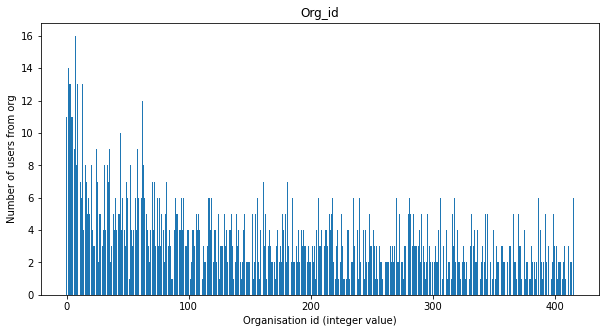

In [62]:
plt.figure(figsize=(10,5))
plt.bar(x=ada_user_org_id.index,height=ada_user_org_id.values)
plt.ylabel("Number of users from org")
plt.xlabel("Organisation id (integer value)")
plt.title("Org_id")

More number of adaptive users belong to the org_id 7 ie 16 adaptive users

The first 100 org_id contribute for the adaptive users more than 10 for each id


In [38]:
ada_user_data2["visited"].corr(ada_user_data2["org_id"])

0.02809519762401716

Number of visits made by the adaptive users do not have any major relation with their org_id

In [39]:
ada_user_email=ada_user_data2.groupby(ada_user_data2["opted_in_to_mailing_list"])["ones"].sum()
ada_user_email

opted_in_to_mailing_list
0    1067.0
1     378.0
Name: ones, dtype: float64

In [40]:
ada_user_data2["visited"].corr(ada_user_data2["opted_in_to_mailing_list"])

-0.009628640959967055

Marketing emails did not show not impact on the adaption of users

In [41]:
ada_user_data2["visited"].corr(ada_user_data2["invited_by_user_id"])

-0.005496189588453272

Invitation by users also did not show any particular impact on the adaptive uses

****Total data analysis****

In [42]:
total_data=pd.merge(file2,user_3_unidata,how="outer",right_on="user_id",left_on="object_id")
total_data.drop("user_id",axis=1,inplace=True)
total_data

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active
0,1,22-04-2014 03:53,Clausen August,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0
2,3,19-03-2013 23:14,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,21-05-2013 08:09,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,17-01-2013 10:14,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,06-09-2013 06:14,Meier Sophia,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN,NaN
11996,11997,10-01-2013 18:28,Fisher Amelie,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN,NaN
11997,11998,27-04-2014 12:45,Haynes Jake,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN,NaN
11998,11999,31-05-2012 11:55,Faber Annett,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,NaN,NaN


In [43]:
#Data cleaning (filling the null values with 0)
total_data["invited_by_user_id"]=total_data["invited_by_user_id"].fillna(0)
total_data["visited"]=total_data["visited"].fillna(0)
total_data["active"]=total_data["active"].fillna(0)
total_data

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active
0,1,22-04-2014 03:53,Clausen August,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0
1,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0
2,3,19-03-2013 23:14,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0
3,4,21-05-2013 08:09,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0
4,5,17-01-2013 10:14,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,06-09-2013 06:14,Meier Sophia,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,0.0
11996,11997,10-01-2013 18:28,Fisher Amelie,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,0.0
11997,11998,27-04-2014 12:45,Haynes Jake,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,0.0
11998,11999,31-05-2012 11:55,Faber Annett,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0,0.0


In [44]:
#Creating dummy for the creation_source column
total_data_dum=pd.get_dummies(total_data["creation_source"])
total_data_dum=total_data_dum.assign(user_id=total_data["object_id"])
total_data_dum

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,user_id
0,1,0,0,0,0,1
1,0,1,0,0,0,2
2,0,1,0,0,0,3
3,1,0,0,0,0,4
4,1,0,0,0,0,5
...,...,...,...,...,...,...
11995,0,1,0,0,0,11996
11996,0,0,0,0,1,11997
11997,1,0,0,0,0,11998
11998,0,0,1,0,0,11999


In [45]:
total_data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   GUEST_INVITE        12000 non-null  uint8
 1   ORG_INVITE          12000 non-null  uint8
 2   PERSONAL_PROJECTS   12000 non-null  uint8
 3   SIGNUP              12000 non-null  uint8
 4   SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
 5   user_id             12000 non-null  int64
dtypes: int64(1), uint8(5)
memory usage: 246.1 KB


In [46]:
#Merging the dummy and the original file
total_data=pd.merge(total_data,total_data_dum,how="outer",left_on="object_id",right_on="user_id")
total_data

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,user_id
0,1,22-04-2014 03:53,Clausen August,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0,1,0,0,0,0,1
1,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,0,1,0,0,0,2
2,3,19-03-2013 23:14,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0,0,1,0,0,0,3
3,4,21-05-2013 08:09,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0,1,0,0,0,0,4
4,5,17-01-2013 10:14,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,06-09-2013 06:14,Meier Sophia,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,0.0,0,1,0,0,0,11996
11996,11997,10-01-2013 18:28,Fisher Amelie,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,0.0,0,0,0,0,1,11997
11997,11998,27-04-2014 12:45,Haynes Jake,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,0.0,1,0,0,0,0,11998
11998,11999,31-05-2012 11:55,Faber Annett,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0,0.0,0,0,1,0,0,11999


In [47]:
total_data

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,user_id
0,1,22-04-2014 03:53,Clausen August,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0,1,0,0,0,0,1
1,2,15-11-2013 03:45,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,0,1,0,0,0,2
2,3,19-03-2013 23:14,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0,0,1,0,0,0,3
3,4,21-05-2013 08:09,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0,1,0,0,0,0,4
4,5,17-01-2013 10:14,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,06-09-2013 06:14,Meier Sophia,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,0.0,0,1,0,0,0,11996
11996,11997,10-01-2013 18:28,Fisher Amelie,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,0.0,0,0,0,0,1,11997
11997,11998,27-04-2014 12:45,Haynes Jake,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,0.0,1,0,0,0,0,11998
11998,11999,31-05-2012 11:55,Faber Annett,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0,0.0,0,0,1,0,0,11999


In [48]:
#Droping unwanted columns
total_data.drop(total_data.columns[[1,2,3,4,16]],axis=1,inplace=True)


In [49]:
total_data

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,0.0,0.0,1,0,0,0,0
1,2,0,0,1,316.0,3.0,1.0,0,1,0,0,0
2,3,0,0,94,1525.0,0.0,0.0,0,1,0,0,0
3,4,0,0,1,5151.0,0.0,0.0,1,0,0,0,0
4,5,0,0,193,5240.0,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,0,0,89,8263.0,0.0,0.0,0,1,0,0,0
11996,11997,0,0,200,0.0,0.0,0.0,0,0,0,0,1
11997,11998,1,1,83,8074.0,0.0,0.0,1,0,0,0,0
11998,11999,0,0,6,0.0,0.0,0.0,0,0,1,0,0


In [50]:
#Performing correlation tecnique
total_data.corr()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,active,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,1.000000,-0.032370,-0.022040,0.004110,0.001657,-0.006848,0.007481,-0.006909,-0.003988,-0.003357,0.002692,0.015089
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,0.007536,0.003750,0.010339,0.000667,0.006694,-0.007432,0.002181,-0.004555
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,0.003431,0.001505,0.005901,-0.002438,0.004270,-0.007518,0.004528,0.000127
org_id,0.004110,0.003432,0.009275,1.000000,-0.040868,0.045193,0.060683,-0.002045,-0.017586,0.008974,0.016140,-0.001052
invited_by_user_id,0.001657,0.007536,0.003431,-0.040868,1.000000,0.009448,0.017648,0.330140,0.536313,-0.380800,-0.378170,-0.297710
visited,-0.006848,0.003750,0.001505,0.045193,0.009448,1.000000,0.620172,0.027065,-0.008901,-0.051520,0.002720,0.038932
active,0.007481,0.010339,0.005901,0.060683,0.017648,0.620172,1.000000,0.043657,-0.011376,-0.072093,0.016004,0.031432
GUEST_INVITE,-0.006909,0.000667,-0.002438,-0.002045,0.330140,0.027065,0.043657,1.000000,-0.347502,-0.216653,-0.215157,-0.169380
ORG_INVITE,-0.003988,0.006694,0.004270,-0.017586,0.536313,-0.008901,-0.011376,-0.347502,1.000000,-0.342395,-0.340031,-0.267686
PERSONAL_PROJECTS,-0.003357,-0.007432,-0.007518,0.008974,-0.380800,-0.051520,-0.072093,-0.216653,-0.342395,1.000000,-0.211995,-0.166891


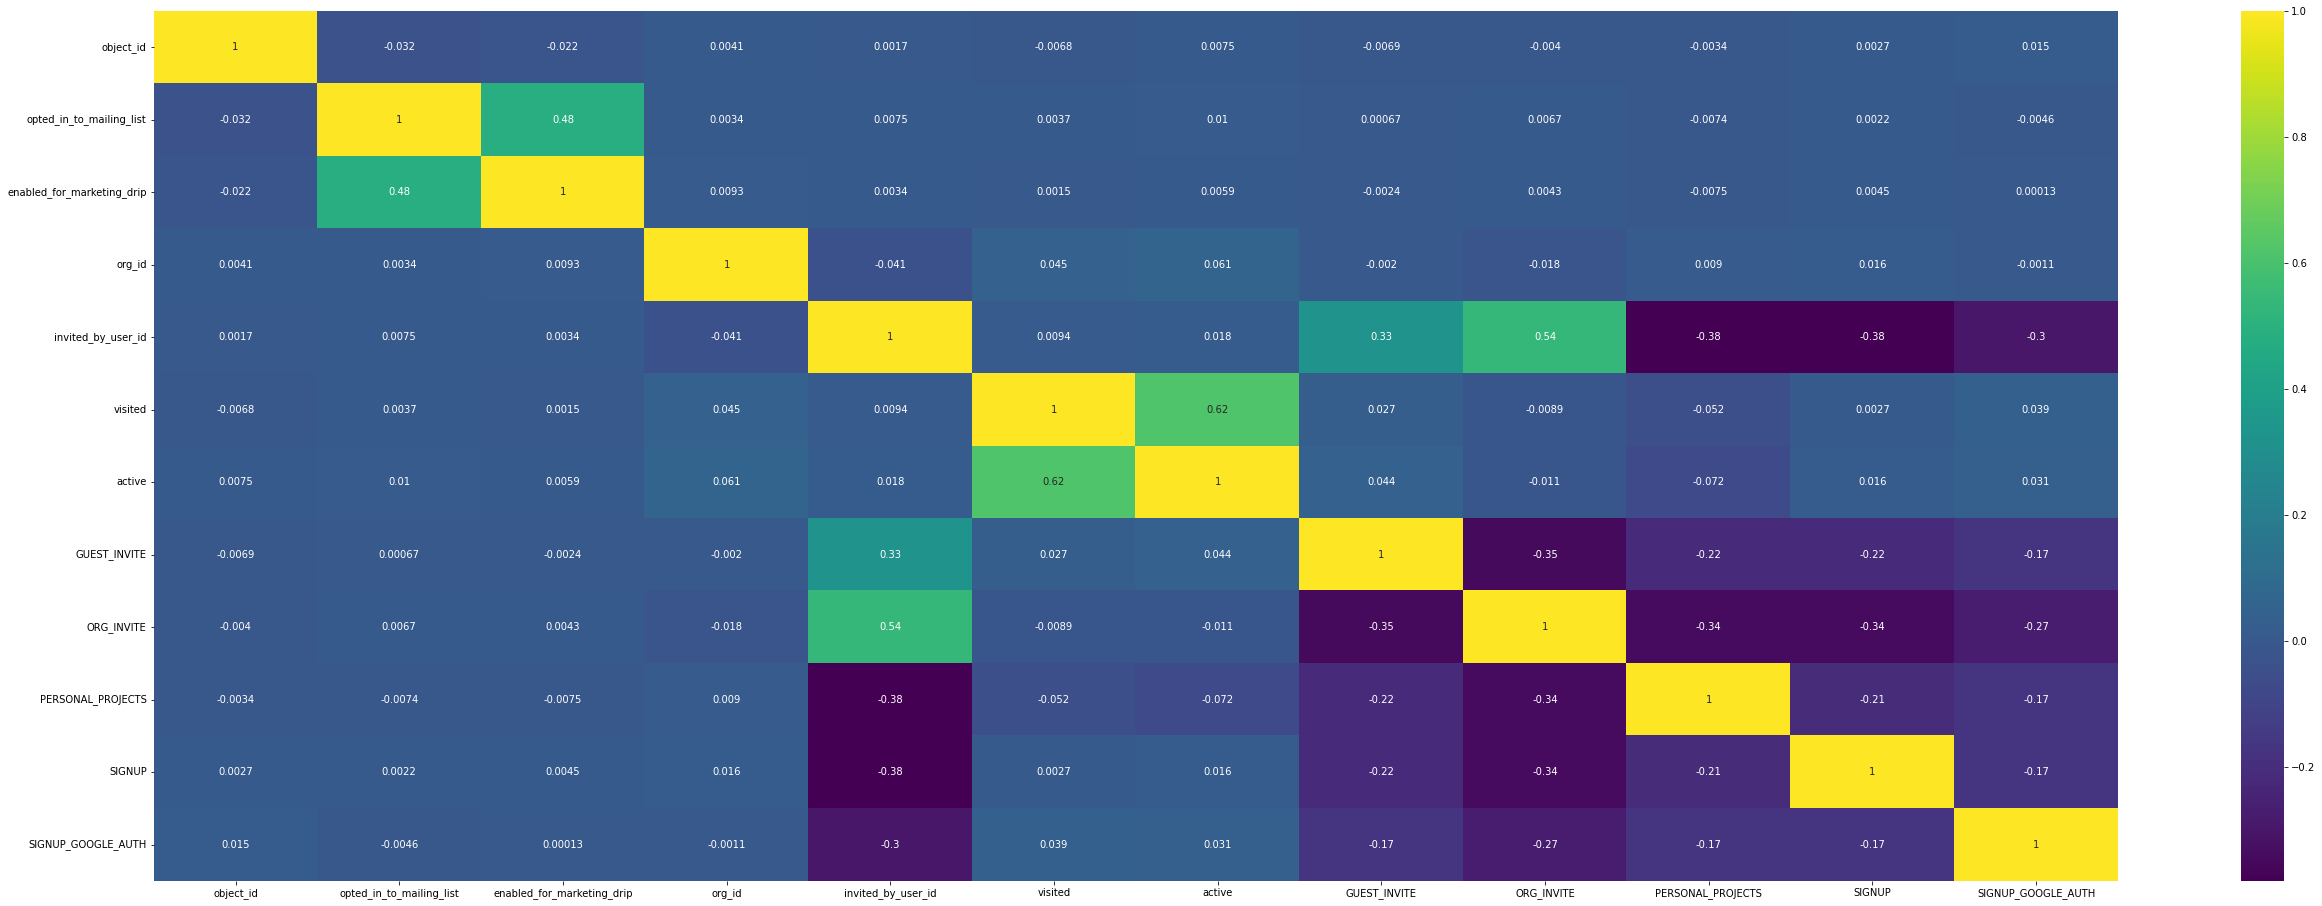

In [61]:
plt.figure(figsize=(44,16))
cm=total_data.corr()

sns.heatmap(cm, annot=True, cmap='viridis')



From the map we can say that if the user is an active user then there is probability for the user to become an adaptive user.